<a href="https://colab.research.google.com/github/Andurazo/Project-7-ICE/blob/main/Proyecto_S7_%22ICE%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1. Abre el archivo de datos y estudia la información general.

Se nombra al dataframe como "videogames" y se cargan todas las librerías.

In [ ]:
import math
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/games.csv'

videogames = pd.read_csv(file_path)

videogames.info()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas)

In [ ]:
videogames.columns = videogames.columns.str.lower()
videogames.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Convierte los datos en los tipos necesarios.

In [ ]:
videogames.year_of_release.isna().sum()
median_yr = videogames.year_of_release.median()
videogames.year_of_release.fillna(median_yr, inplace=True)
videogames.year_of_release = videogames.year_of_release.astype(int)
videogames.year_of_release.dtype

dtype('int64')

Se convierte de float a int porque el decimal .0 no afecta el análisis posterior, primero se reemplazan los nan con la mediana para no presentar sesgos en la información.

In [ ]:
median_crit = videogames.critic_score.median()
videogames.critic_score.fillna(median_crit, inplace=True)
videogames.critic_score = videogames.critic_score.astype(int)
videogames.critic_score.dtype

dtype('int64')

Se convierte de float a int porque el decimal .0 no afecta el análisis posterior, primero se reemplazan los nan con la mediana para no presentar sesgos en la información.

In [ ]:
videogames.user_score = pd.to_numeric(videogames.user_score, errors='coerce')
median_user = videogames.user_score.median()
videogames.user_score.fillna(median_user, inplace=True)
videogames.user_score.dtype

dtype('float64')

Se convierte esta columna en dato numérico en caso de manipularla a la postre, como son puntuaciones de juegos con decimal, el suprimirlos si afectaría el análisis por lo cual lo mantuve en flotante, sólo reemplacé los valores ausentes con la mediana de igual forma para no presentar sesgos.

In [ ]:
videogames.rating.fillna('Unknown', inplace=True)
videogames.rating.dtype

dtype('O')

En el caso de esta columna se deja como tipo object debido a que son clasificaciones de juegos, en el caso de los valores ausentes decidí cambiarlos por 'Unknown' debido a que no se tiene información de la puntuación de parte de ESRB.

Es probable que se tengan valores ausentes debido a que aún no han sido evaluados de parte de la ESRB o no se tiene esta base de datos actualizada correctamente, por errores de medición o de formato.

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [ ]:
videogames['sales_total'] = videogames.na_sales + videogames.eu_sales + videogames.jp_sales + videogames.other_sales
videogames.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown,31.38


#Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

Si, debido a que por periodo puedes ver que juegos fueron lanzados para que consola y cuales fueron los más vendidos, puedes tambien ver las ventas por región y debido a la nueva columna creada puedes ver las ventas totales globales.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [ ]:
sales_per_platform_per_year = videogames.groupby(['platform', 'year_of_release'])['sales_total'].sum().reset_index(name='total_sales').sort_values(by='total_sales')
sales_per_platform_per_year


,platform,year_of_release,total_sales
25,DC,2007,0.02
27,DS,1985,0.02
11,3DO,1994,0.02
123,PCFX,1996,0.03
98,PC,1988,0.03
...,...,...,...
205,Wii,2008,171.32
138,PS2,2003,184.31
137,PS2,2002,205.38
206,Wii,2009,206.97


Se agrupan las columnas de platform & year_of_release junto con sales_total para obtener el valor de las ventas totales por año por consola en orden ascendente

<Figure size 1500x800 with 0 Axes>

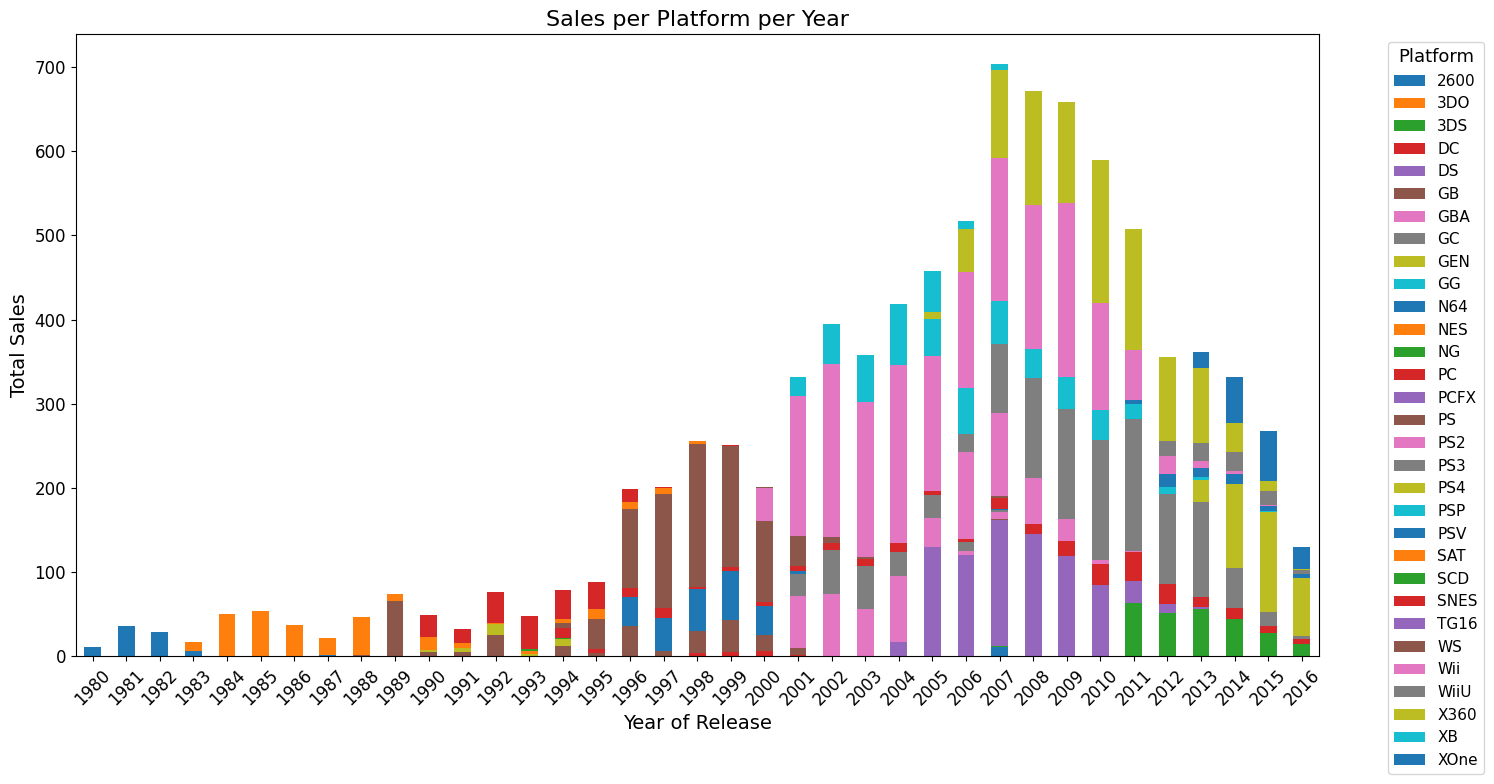

In [ ]:
pivot_data = sales_per_platform_per_year.pivot(index='year_of_release', columns='platform', values='total_sales')

plt.figure(figsize=(15, 8))


pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Sales per Platform per Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.legend(title='Platform', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Se usa una gráfica de barras stacked para poder tener mejor visibilidad de los datos y ver como con el paso de los años ciertas consolas se mantienen en la preferencia de los consumidores y otras simplemente se descontinuan para abrirle paso a las nuevas generaciones. Sobretodo con ciertas excepciones como las de PS, PS2 y PS3 que se mantuvieron al a cabeza por alrededor de 17 años seguidos.
Analizando la gráfica puedo determinar que en promedio a una consola le toma 5-7 años caer en obsolescencia y dar paso a la siguiente generacion con ciertas excepciones como el caso del PS y el PS2 se mantuvieron con altos márgenes de ventas desde la salida del 1ro en el 94-95 hasta que lo desfasaron en el 2003 siguio su curso el PS2 que es la consola mas vendida de la historia que estuvo en circulación desde su fecha de lanzamiento en el 2000 hasta el 2014. Mismo caso con XBOX360 y Wii pudieron mantenerse aproximadamente 10 años en el mercado.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [ ]:
sales_per_platform_per_year[sales_per_platform_per_year['year_of_release'] >= 2014].sort_values(by='total_sales', ascending=False)

,platform,year_of_release,total_sales
160,PS4,2015,118.90
159,PS4,2014,100.00
161,PS4,2016,69.25
242,XOne,2015,60.14
241,XOne,2014,54.07
155,PS3,2014,47.76
17,3DS,2014,43.76
228,X360,2014,34.74
18,3DS,2015,27.78
243,XOne,2016,26.15


Se realiza un filtro para solo analizar consolas del 2014-2016 para tener un tamaño de muestra más grande, basándonos en el gráfico anterior podemos ver que el Nintendo 3DS ha ido a la baja junto con el Wii y el Wii U.PS3 sufre un decremento debido a que el PS4 se encuentra en el mercado desde 2013 por lo cual el consumidor trata de mudarse a la nueva generación de consolas. Xbox 360 enfrenta un escenario similar con el lanzamiento del Xbox One en 2013 de igual forma que el PS4; sin embargo, mantiene un crecimiento sostenido y se posiciona como una consola con buen nivel de ventas. PC muestra un crecimiento sostenido nada sobresaliente. PS Vita mantiene un crecimiento fijo sin acercarse al 3DS (ambas consolas portátiles).
Como se muestra las consolas líderes son PS4, Xbox One y 3DS, pero en base al comportamiento de las ventas y rendimiento de las consolas de última generación asi como los videojuegos que se pueden jugar con ellas, se cree que se debe apostar por el PS4, Xbox One y la PC por mostrar mayor rentabilidad de entre el resto. Se cree que el 3DS ya pasó su mejor momento y la tendencia seguirá a la baja hasta el lanzamiento de la nueva consola de Nintendo, lo que volverá al 3DS obsoleto.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Text(0, 0.5, 'Distribution of Sales')

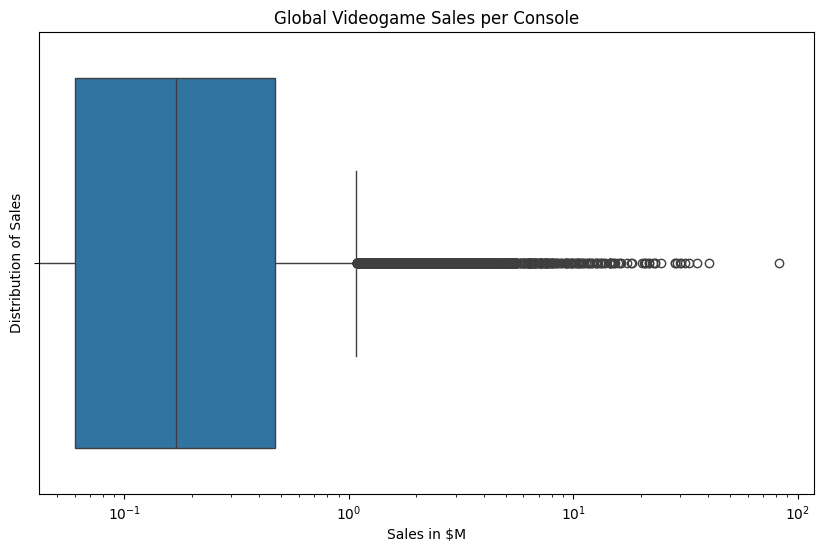

In [ ]:
sales_per_platform_per_videogame = videogames.groupby(['platform', 'name'])['sales_total'].sum().reset_index(name='grand_total_sales').sort_values(by='grand_total_sales')


plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_per_platform_per_videogame, x='grand_total_sales')
plt.xscale('log')
plt.title('Global Videogame Sales per Console')
plt.xlabel('Sales in $M')
plt.ylabel('Distribution of Sales')


Se realiza un diagrama de caja de las ventas globales de todos los tiempos para los videjuegos de todas las consolas que hay para tener una idea aproximada de lo que nos espera al filtrar por consola y por los años necesarios para elaborar un modelo del 2017.

In [ ]:
sales_per_platform_per_videogame = videogames.groupby(['platform', 'name', 'year_of_release'])['sales_total'].sum().reset_index(name='grand_total_sales').sort_values(by='grand_total_sales')
year_sales_2014_2016 = sales_per_platform_per_videogame[sales_per_platform_per_videogame['year_of_release'] >= 2014].sort_values(by='grand_total_sales', ascending=False)
year_sales_2014_2016.head(20)

,platform,name,year_of_release,grand_total_sales
10501,PS4,Call of Duty: Black Ops 3,2015,14.63
10590,PS4,Grand Theft Auto V,2014,12.62
480,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014,11.68
10564,PS4,FIFA 16,2015,8.58
10758,PS4,Star Wars Battlefront (2015),2015,7.98
10500,PS4,Call of Duty: Advanced Warfare,2014,7.66
10565,PS4,FIFA 17,2016,7.60
580,3DS,Super Smash Bros. for Wii U and 3DS,2014,7.55
16495,XOne,Call of Duty: Black Ops 3,2015,7.39
10567,PS4,Fallout 4,2015,7.17


Se realiza un nuevo dataframe donde se agrupa por consola, nombre, año de lanzamiento y ventas totales, también se filtra únicamente por los años del 2014-2016. Se consideró utilizar una muestra de 3 años para en base a esto construir un modelo que ayude a predecir el comportamiento del consumidor en el año 2017.

Text(0, 0.5, 'Distribution of Sales')

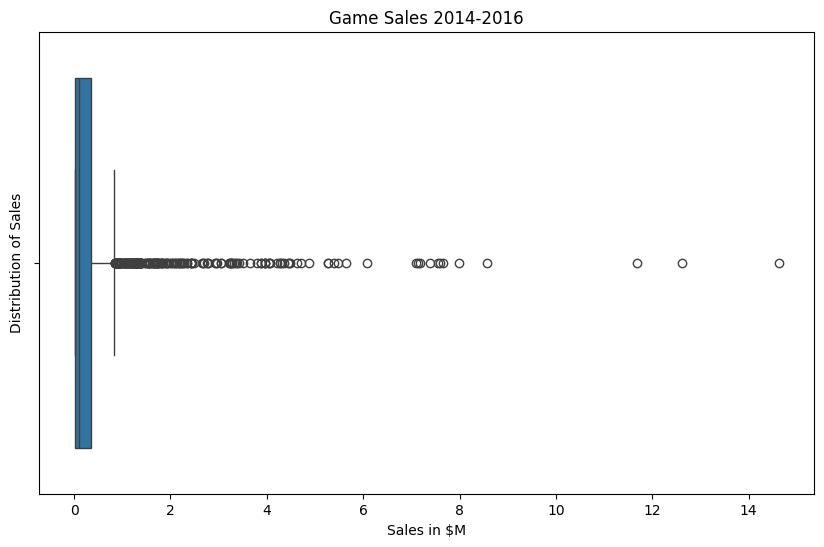

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=year_sales_2014_2016, x='grand_total_sales')
plt.title('Game Sales 2014-2016')
plt.xlabel('Sales in $M')
plt.ylabel('Distribution of Sales')

Se hace un diagrama de caja de las ventas totales de todas las consolas de los años 2014-2016 de igual manera para tener un aproximado de lo que nos espera antes de filtar por consola. Vemos que la mayoría de los juegos que se vendieron en este periodo se vendieron por entre 0-2 mdd, lo cual comparativamente son valores bajos. Hay varios valores atípicos con niveles de ventas superiores, de igual forma, vemos una distribución asimétrica hacia la derecha.

In [ ]:
PS4_year_sales_2014_2016 = sales_per_platform_per_videogame[(sales_per_platform_per_videogame['year_of_release'] >= 2014) & (sales_per_platform_per_videogame['platform'] == 'PS4')].sort_values(by='grand_total_sales', ascending=False)
PS4_year_sales_2014_2016['grand_total_sales'].describe()

,grand_total_sales
count,376.000000
mean,0.766356
std,1.614969
min,0.010000
25%,0.057500
50%,0.185000
75%,0.690000
max,14.630000


Se filtra el nuevo dataframe de ventas por plataforma por videojuego donde se seleccionan los años requeridos y la consola PS4.

Text(0, 0.5, 'Distribution of Sales')

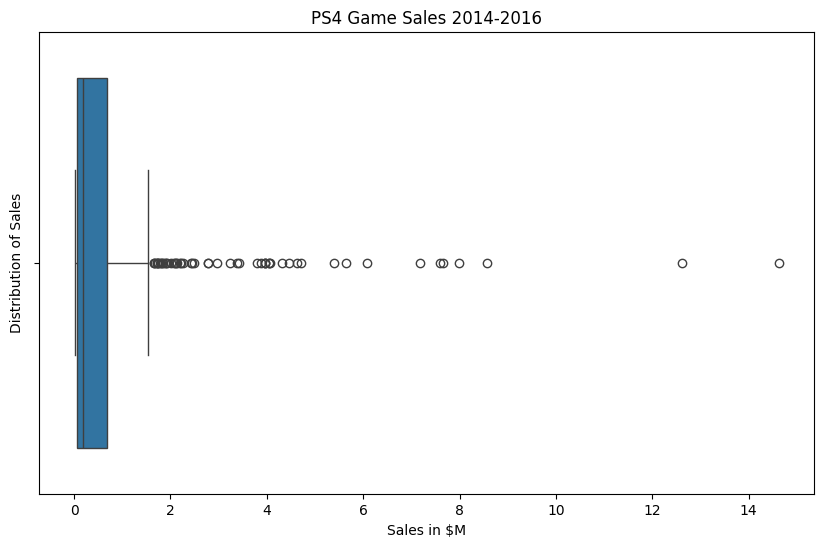

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=PS4_year_sales_2014_2016, x='grand_total_sales')
plt.title('PS4 Game Sales 2014-2016')
plt.xlabel('Sales in $M')
plt.ylabel('Distribution of Sales')

Se realiza un diagrama de caja para las ventas de 2014-2016 para el PS4. Se observa de manera similar al diagrama de caja anterior, que hay una concentración importante de juegos por debajo de 2 mdd donde se encuentra la mayoría de los juegos.
Vemos un buen número de valores atípicos lo que indica una diversidad sobresaliente en cuanto a los títulos de esta consola con algunos de ellos superando los 10 mdd en ventas. Lo que podria indicar que es un mercado competitivo con potencial de generar muchos éxitos a nivel de ventas.

In [ ]:
XboxOne_year_sales_2014_2016 = sales_per_platform_per_videogame[(sales_per_platform_per_videogame['year_of_release'] >= 2014) & (sales_per_platform_per_videogame['platform'] == 'XOne')].sort_values(by='grand_total_sales', ascending=False)
XboxOne_year_sales_2014_2016['grand_total_sales'].describe()

,grand_total_sales
count,228.000000
mean,0.615614
std,1.046513
min,0.010000
25%,0.050000
50%,0.205000
75%,0.632500
max,7.390000


Text(0, 0.5, 'Distribution of Sales')

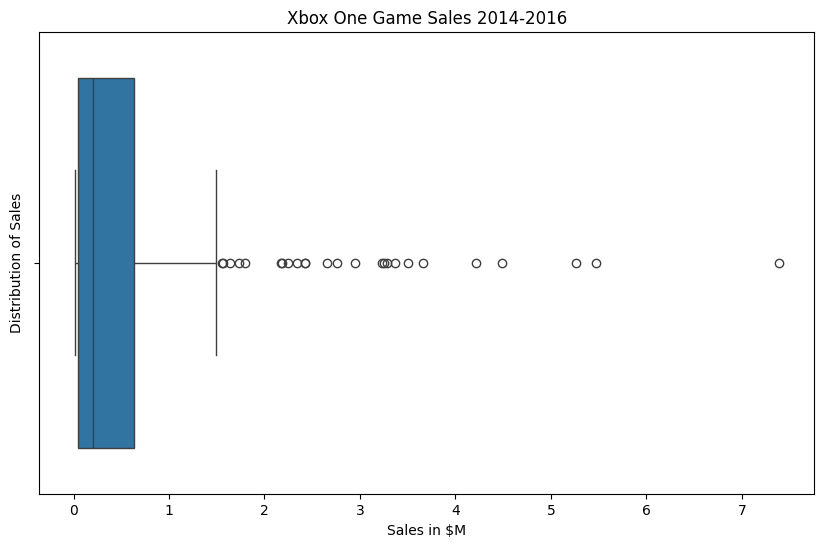

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=XboxOne_year_sales_2014_2016, x='grand_total_sales')
plt.title('Xbox One Game Sales 2014-2016')
plt.xlabel('Sales in $M')
plt.ylabel('Distribution of Sales')

Se hace lo propio con la consola Xbox One. Vemos como en el caso anterior que la caja esta inclinada a la izquierda lo cual indica que la mayoria de los juegos tuvieron ventas bajas, en este caso por debajo de 1 mdd. Similar al caso del PS4, hay un buen número de valores atípicos, lo cual indica una buena diversidad y competencia en el mercado con varios juegos alcanzando niveles significativos de ventas.

In [ ]:
WiiU_year_sales_2014_2016 = sales_per_platform_per_videogame[(sales_per_platform_per_videogame['year_of_release'] >= 2014) & (sales_per_platform_per_videogame['platform'] == 'WiiU')].sort_values(by='grand_total_sales', ascending=False)
WiiU_year_sales_2014_2016['grand_total_sales'].describe()

,grand_total_sales
count,73.000000
mean,0.588767
std,1.161467
min,0.010000
25%,0.050000
50%,0.190000
75%,0.570000
max,7.090000


Text(0, 0.5, 'Distribution of Sales')

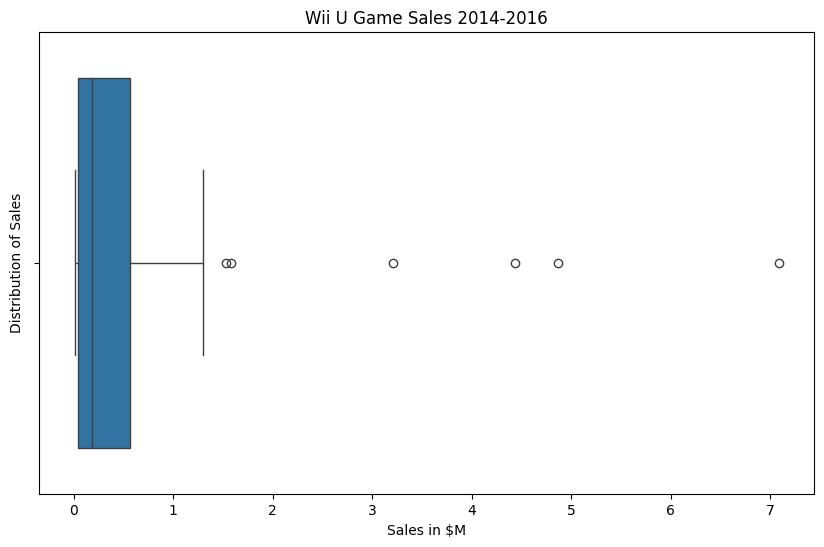

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=WiiU_year_sales_2014_2016, x='grand_total_sales')
plt.title('Wii U Game Sales 2014-2016')
plt.xlabel('Sales in $M')
plt.ylabel('Distribution of Sales')

Se hace lo propio para el Wii U, vemos que de igual manera la mayoría de los juegos se ubican debajo del umbral del millón de dólares, hay pocos valores atípicos comparados con los del PS4 y el Xbox One. Si bien hay algunos juegos que lograron ventas buenas no hay alguno que haya logrado niveles tan altos como de las dos consolas anteriores. Parece ser que el mercado está enfrentando dificultades, no se ven muchos éxitos significativos de los últimos tres años para el 2017, lo que podriamos asociar con el hecho de que el ciclo de vida de la consola está llegando a su fin por lo cual su auge parece ya haber quedado atrás.

In [ ]:
N3DS_year_sales_2014_2016 = sales_per_platform_per_videogame[(sales_per_platform_per_videogame['year_of_release'] >= 2014) & (sales_per_platform_per_videogame['platform'] == '3DS')].sort_values(by='grand_total_sales', ascending=False)
N3DS_year_sales_2014_2016['grand_total_sales'].describe()

,grand_total_sales
count,212.000000
mean,0.408868
std,1.188368
min,0.010000
25%,0.030000
50%,0.090000
75%,0.250000
max,11.680000


Text(0, 0.5, 'Distribution of Sales')

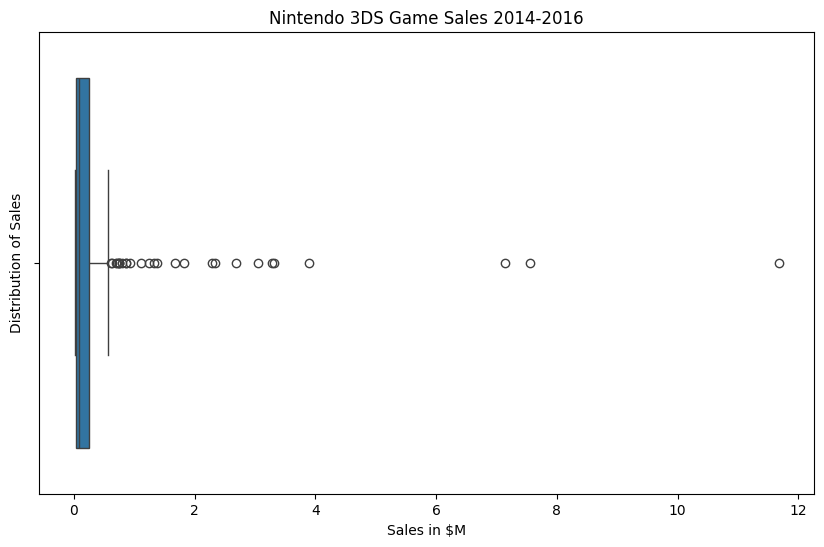

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=N3DS_year_sales_2014_2016, x='grand_total_sales')
plt.title('Nintendo 3DS Game Sales 2014-2016')
plt.xlabel('Sales in $M')
plt.ylabel('Distribution of Sales')

Se hace lo propio con el Nintendo 3DS, de igual manera que con las otras tres consolas que analizamos, vemos una distribucion sesgada hacia la izquierda, denotando la mayoria de los juegos vendidos por debajo de la marca de los 2 mdd. Vemos valores atípicos si bien son más que en el caso del Wii U vemos que no se comparan con los del PS4/Xbox One. Son hechos aislados los títulos que tienen mucho éxito comercial, pero esos podrían corresponder a los títulos exclusivos de Nintendo, al igual que en el caso del Wii U. Vemos un mercado con pocos éxitos lo cual se podría asociar tambien a un ciclo de vida ya avanzado, donde el mejor momento ha quedado atrás y no genera el mismo impacto que en años pasados.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [ ]:
sales_per_platform_per_videogame_with_score = videogames.groupby(['platform', 'name', 'year_of_release', 'critic_score', 'user_score'])['sales_total'].sum().reset_index(name='aggregate_total_sales').sort_values(by='aggregate_total_sales')
score_year_sales_2014_2016 = sales_per_platform_per_videogame_with_score[sales_per_platform_per_videogame_with_score['year_of_release'] >= 2014].sort_values(by='aggregate_total_sales', ascending=False)
score_year_sales_2014_2016.head(20)

,platform,name,year_of_release,critic_score,user_score,aggregate_total_sales
10501,PS4,Call of Duty: Black Ops 3,2015,71,7.5,14.63
10590,PS4,Grand Theft Auto V,2014,97,8.3,12.62
480,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014,71,7.5,11.68
10564,PS4,FIFA 16,2015,82,4.3,8.58
10758,PS4,Star Wars Battlefront (2015),2015,71,7.5,7.98
10500,PS4,Call of Duty: Advanced Warfare,2014,83,5.7,7.66
10565,PS4,FIFA 17,2016,85,5.0,7.60
580,3DS,Super Smash Bros. for Wii U and 3DS,2014,71,7.5,7.55
16495,XOne,Call of Duty: Black Ops 3,2015,71,7.5,7.39
10567,PS4,Fallout 4,2015,87,6.5,7.17


Se agrupan nuestro dataframe principal "videogames" por nombre, año, puntuaciones de usuario y críticos asi como las ventas totales que ya habiamos calculado antes, sólo le cambiamos el nombre a la columna. También filtramos por los años que hemos estado usando para la muestra 2014-2016, ordenando por orden descendente de ventas totales.

In [ ]:
PS4_year_sales_2014_2016_with_score = sales_per_platform_per_videogame_with_score[(sales_per_platform_per_videogame_with_score['year_of_release'] >= 2014) & (sales_per_platform_per_videogame_with_score['platform'] == 'PS4')].sort_values(by='aggregate_total_sales', ascending=False)
PS4_year_sales_2014_2016_with_score.head()

,platform,name,year_of_release,critic_score,user_score,aggregate_total_sales
10501,PS4,Call of Duty: Black Ops 3,2015,71,7.5,14.63
10590,PS4,Grand Theft Auto V,2014,97,8.3,12.62
10564,PS4,FIFA 16,2015,82,4.3,8.58
10758,PS4,Star Wars Battlefront (2015),2015,71,7.5,7.98
10500,PS4,Call of Duty: Advanced Warfare,2014,83,5.7,7.66


Filtramos para que solamente nos muestre las ventas de los videojuegos de la consola PS4.

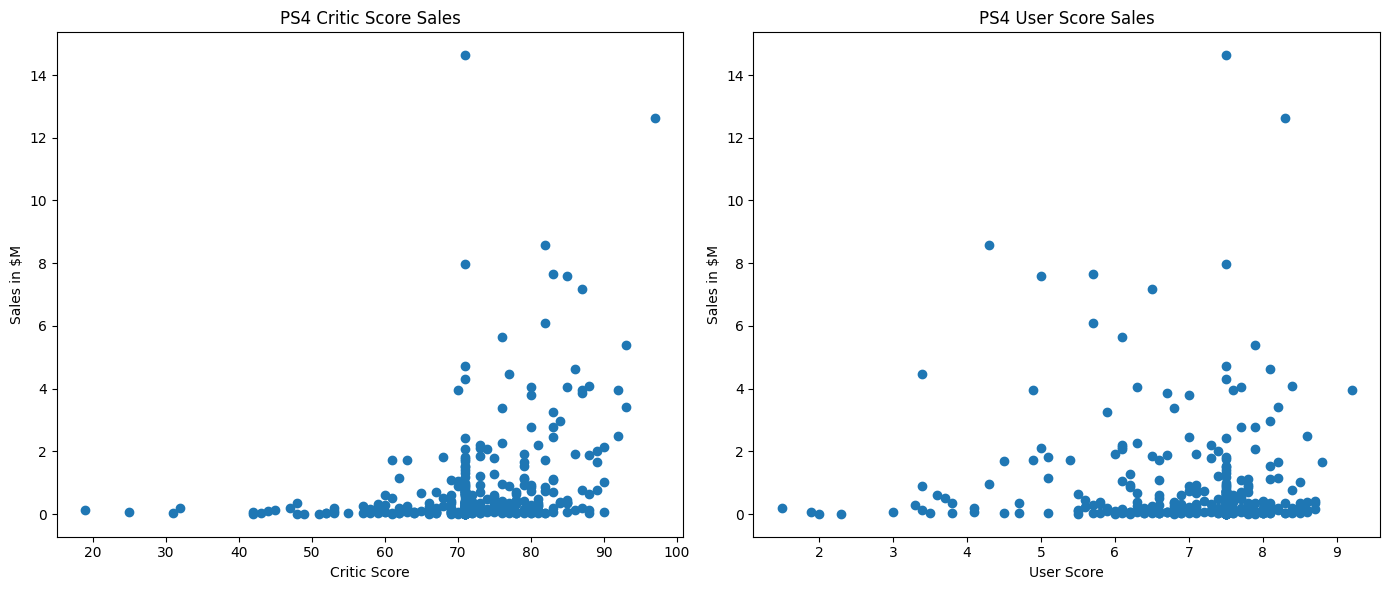

In [ ]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(PS4_year_sales_2014_2016_with_score['critic_score'], PS4_year_sales_2014_2016_with_score['aggregate_total_sales'])
plt.title('PS4 Critic Score Sales')
plt.xlabel('Critic Score')
plt.ylabel('Sales in $M')


plt.subplot(1, 2, 2)
plt.scatter(PS4_year_sales_2014_2016_with_score['user_score'], PS4_year_sales_2014_2016_with_score['aggregate_total_sales'])
plt.title('PS4 User Score Sales')
plt.xlabel('User Score')
plt.ylabel('Sales in $M')

plt.tight_layout()
plt.show()

In [ ]:
PS4_critic_correlation = PS4_year_sales_2014_2016_with_score['critic_score'].corr(PS4_year_sales_2014_2016_with_score['aggregate_total_sales'])
PS4_user_correlation = PS4_year_sales_2014_2016_with_score['user_score'].corr(PS4_year_sales_2014_2016_with_score['aggregate_total_sales'])

print('La correlación entre las ventas y las reseñas de los críticos es', PS4_critic_correlation ,'y la correlación entre ventas y reseñas de los usuarios es', PS4_user_correlation)

La correlación entre las ventas y las reseñas de los críticos es 0.3336147275169688 y la correlación entre ventas y reseñas de los usuarios es -0.06407535236901872


Se elaboran gráficas de dispersión para evaluar la correlación entre los juegos con reseñas de críticos y de usuarios. En base a nuestro análisis vemos que la correlación con respecto a las puntuaciones de los críticos es débil, mientras hay una tendencia ligera por los juegos con puntuaciones más altas de venderse mejor no es un factor determinante.
En el caso de los juegos con puntuaciones de usuarios, estamos hablando de una correlación extremadamente baja asi que sugiere que no hay una relacion clara entre este factor y las ventas de videojuegos, ya que parecen tener un mínimo impacto.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [ ]:
XboxOne_year_sales_2014_2016_with_score = sales_per_platform_per_videogame_with_score[(sales_per_platform_per_videogame_with_score['year_of_release'] >= 2014) & (sales_per_platform_per_videogame_with_score['platform'] == 'XOne')].sort_values(by='aggregate_total_sales', ascending=False)
XboxOne_year_sales_2014_2016_with_score.head()

,platform,name,year_of_release,critic_score,user_score,aggregate_total_sales
16495,XOne,Call of Duty: Black Ops 3,2015,71,7.5,7.39
16556,XOne,Grand Theft Auto V,2014,97,7.9,5.47
16494,XOne,Call of Duty: Advanced Warfare,2014,81,5.4,5.26
16558,XOne,Halo 5: Guardians,2015,84,6.4,4.49
16539,XOne,Fallout 4,2015,88,6.2,4.22


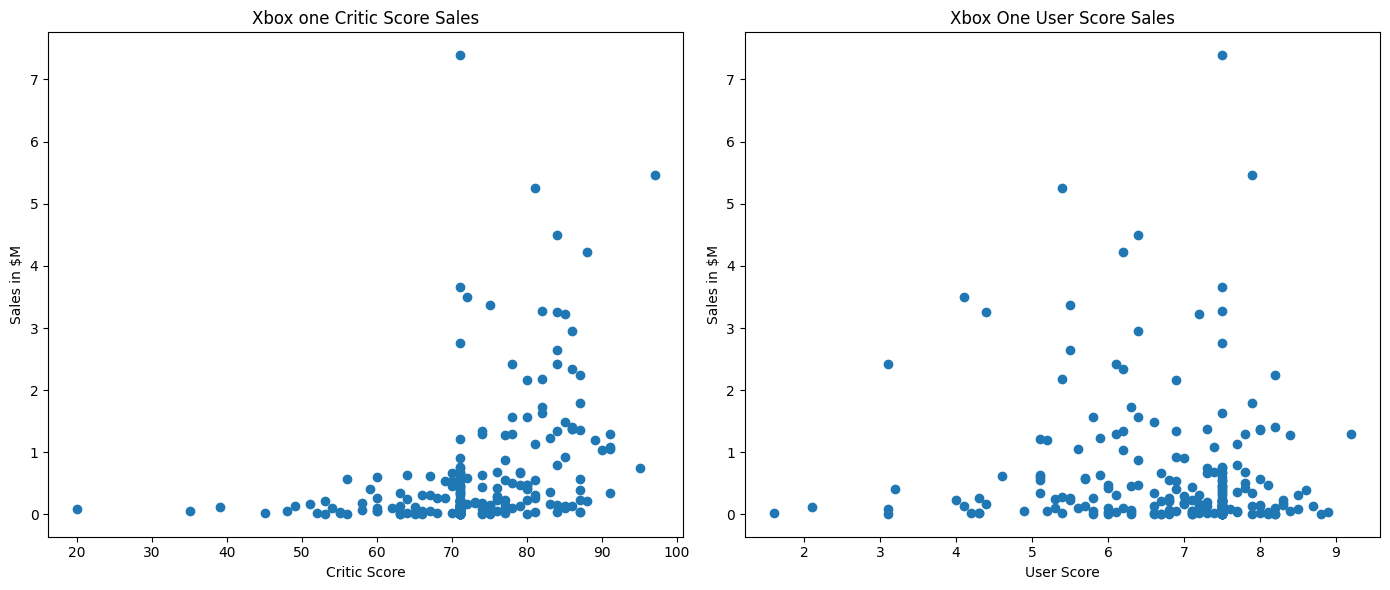

In [ ]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(XboxOne_year_sales_2014_2016_with_score['critic_score'], XboxOne_year_sales_2014_2016_with_score['aggregate_total_sales'])
plt.title('Xbox one Critic Score Sales')
plt.xlabel('Critic Score')
plt.ylabel('Sales in $M')


plt.subplot(1, 2, 2)
plt.scatter(XboxOne_year_sales_2014_2016_with_score['user_score'], XboxOne_year_sales_2014_2016_with_score['aggregate_total_sales'])
plt.title('Xbox One User Score Sales')
plt.xlabel('User Score')
plt.ylabel('Sales in $M')

plt.tight_layout()
plt.show()

In [ ]:
XboxOne_critic_correlation = XboxOne_year_sales_2014_2016_with_score['critic_score'].corr(XboxOne_year_sales_2014_2016_with_score['aggregate_total_sales'])
XboxOne_user_correlation = XboxOne_year_sales_2014_2016_with_score['user_score'].corr(XboxOne_year_sales_2014_2016_with_score['aggregate_total_sales'])

print('La correlación entre las ventas y las reseñas de los críticos es', XboxOne_critic_correlation ,'y la correlación entre ventas y reseñas de los usuarios es', XboxOne_user_correlation)

La correlación entre las ventas y las reseñas de los críticos es 0.37356638112351764 y la correlación entre ventas y reseñas de los usuarios es -0.09921651216624078


Se hace lo propio con los datos del Xbox One para evaluar la correlación entre reseñas de críticos y usuarios. En el caso de los primeros, se aprecia una relación positiva moderada, lo cual indica que si bien hay tendencia de que los juegos con puntuaciones de críticos altas vendan bien no es un factor determinante. En el caso de los segundos, es una correlación muy debil negativa lo cual indica que no hay una relación de impacto entre los juegos con puntuaciones de usuarios altas y las ventas de los videojuegos de esta consola.

In [ ]:
PC_year_sales_2014_2016_with_score = sales_per_platform_per_videogame_with_score[(sales_per_platform_per_videogame_with_score['year_of_release'] >= 2014) & (sales_per_platform_per_videogame_with_score['platform'] == 'PC')].sort_values(by='aggregate_total_sales', ascending=False)
PC_year_sales_2014_2016_with_score.head()

,platform,name,year_of_release,critic_score,user_score,aggregate_total_sales
5610,PC,The Sims 4,2014,70,3.9,3.05
5085,PC,Fallout 4,2015,84,5.4,1.28
5100,PC,Farming Simulator 2015,2014,71,7.5,1.19
5137,PC,Grand Theft Auto V,2015,96,7.9,1.17
5558,PC,The Elder Scrolls Online,2014,71,5.7,0.90


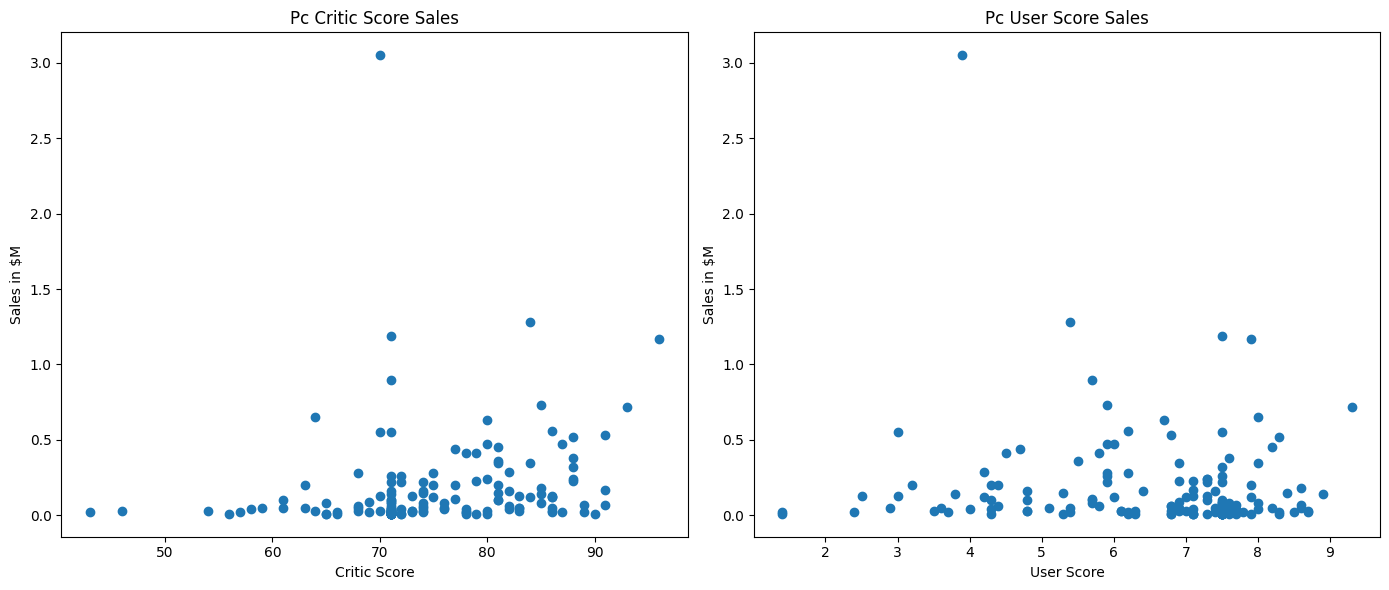

In [ ]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(PC_year_sales_2014_2016_with_score['critic_score'], PC_year_sales_2014_2016_with_score['aggregate_total_sales'])
plt.title('Pc Critic Score Sales')
plt.xlabel('Critic Score')
plt.ylabel('Sales in $M')


plt.subplot(1, 2, 2)
plt.scatter(PC_year_sales_2014_2016_with_score['user_score'], PC_year_sales_2014_2016_with_score['aggregate_total_sales'])
plt.title('Pc User Score Sales')
plt.xlabel('User Score')
plt.ylabel('Sales in $M')

plt.tight_layout()
plt.show()

In [ ]:
PC_critic_correlation = PC_year_sales_2014_2016_with_score['critic_score'].corr(PC_year_sales_2014_2016_with_score['aggregate_total_sales'])
PC_user_correlation = PC_year_sales_2014_2016_with_score['user_score'].corr(PC_year_sales_2014_2016_with_score['aggregate_total_sales'])

print('La correlación entre las ventas y las reseñas de los críticos es', PC_critic_correlation ,'y la correlación entre ventas y reseñas de los usuarios es', PC_user_correlation)

La correlación entre las ventas y las reseñas de los críticos es 0.1954410365901976 y la correlación entre ventas y reseñas de los usuarios es -0.09831469067757166


De igual manera se hacen gráficas de dispersión para los juegos de la Pc con respecto a sus reseñas de críticos y usuarios. Siguiendo la misma tendencia de las dos consolas anteriores, vemos una relación positiva moderada entre los juegos y las puntuaciones de críticos lo que indica una correlación débil entre estos, lo cual no basta para ser un factor determinante en cuanto al éxito en ventas. En cuanto a las reseñas de usuarios es una relación muy débil negativa cercana a cero, denotando que no hay una correlación de impacto entre juegos que vendan bien y que estén bien evaluados por usuarios.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [ ]:
sales_per_genre = videogames.groupby(['year_of_release', 'genre'])['sales_total'].sum().reset_index(name='overall_total_sales').sort_values(by='overall_total_sales')
genre_year_sales_2014 = sales_per_genre[sales_per_genre['year_of_release'] == 2014].sort_values(by='overall_total_sales', ascending=False)
genre_year_sales_2014

,year_of_release,genre,overall_total_sales
351,2014,Action,97.23
359,2014,Shooter,65.21
358,2014,Role-Playing,45.62
361,2014,Sports,45.15
354,2014,Misc,23.38
357,2014,Racing,16.66
353,2014,Fighting,15.85
355,2014,Platform,8.81
360,2014,Simulation,5.58
352,2014,Adventure,5.57


In [ ]:
genre_year_sales_2015 = sales_per_genre[sales_per_genre['year_of_release'] == 2015].sort_values(by='overall_total_sales', ascending=False)
genre_year_sales_2015

,year_of_release,genre,overall_total_sales
363,2015,Action,72.02
371,2015,Shooter,67.51
373,2015,Sports,40.84
370,2015,Role-Playing,37.64
366,2015,Misc,11.57
364,2015,Adventure,8.16
369,2015,Racing,8.07
365,2015,Fighting,7.90
367,2015,Platform,6.05
372,2015,Simulation,5.66


In [ ]:
genre_year_sales_2016 = sales_per_genre[sales_per_genre['year_of_release'] == 2016].sort_values(by='overall_total_sales', ascending=False)
genre_year_sales_2016

,year_of_release,genre,overall_total_sales
383,2016,Shooter,38.22
375,2016,Action,30.11
385,2016,Sports,23.49
382,2016,Role-Playing,18.18
377,2016,Fighting,4.47
376,2016,Adventure,3.82
379,2016,Platform,3.23
381,2016,Racing,2.79
378,2016,Misc,2.60
384,2016,Simulation,1.89


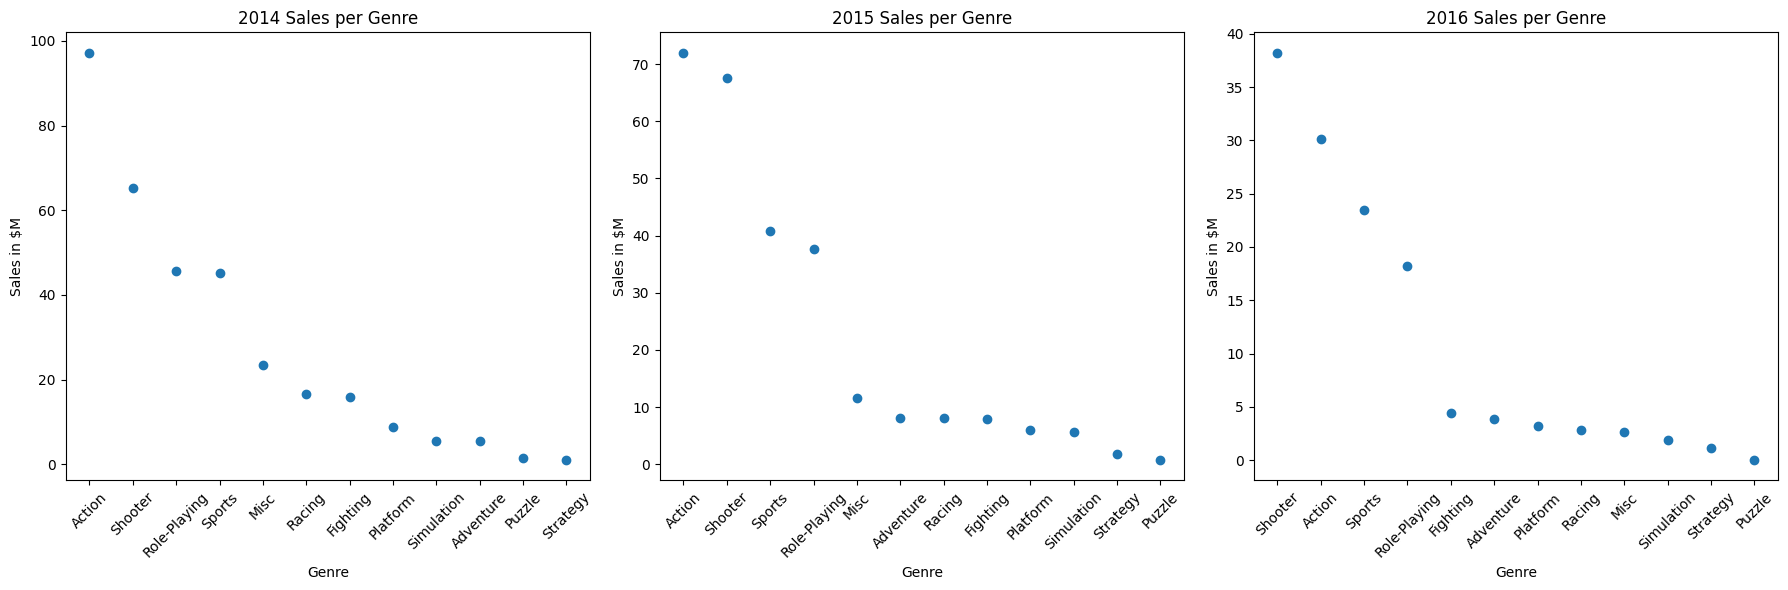

In [ ]:
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.scatter(genre_year_sales_2014['genre'], genre_year_sales_2014['overall_total_sales'])
plt.title('2014 Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Sales in $M')
plt.xticks(rotation=45)


plt.subplot(1, 3, 2)
plt.scatter(genre_year_sales_2015['genre'], genre_year_sales_2015['overall_total_sales'])
plt.title('2015 Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Sales in $M')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.scatter(genre_year_sales_2016['genre'], genre_year_sales_2016['overall_total_sales'])
plt.title('2016 Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Sales in $M')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Se agrupan los datos del dataframe videogames una vez más pero ahora por año de lanzamiento y género para analizar los más rentables en cada uno de los años 2014, 2015 y 2016. Se usan gráficas de dispersión para poder apreciar las tendencias de mejor manera.
En base al análisis se aprecia que los géneros mejores vendidos son los de acción y shooters, con los RPG y de Deportes teniendo una tendencia a la alta, vemos distribuciones mayormente uniformes lo cual quiere decir que se mantienen estables a través de los tres años que analizamos. Los géneros con peores niveles de ventas serian los de simulación, estrategia y puzzles, lo cual podria ser por una baja demanda de parte del consumidor.
En base a estos datos podemos estimar que los géneros más rentables son Action y Shooter, han mantenido esta tendencia en los años de nuestra muestra y parece ser que se mantendran asi, claro sin dejar de lado analizar el tema regional que tiene mucho que ver en cuanto a las preferencias del consumidor. Se pueden hacer generalizaciones sobre estos dos géneros que claramente dominan el mercado de videojuegos probablemente por su naturaleza dinámica y emocionante que llama poderosamente la atención de los gamers. Los juegos de deportes siempre son favoritos por simular la experiencia de jugadores profesionales en distintas disciplinas, siempre cuentan con un fandom bastante fuerte. Los RPG's especialmente de open world te ofrecen una experiencia de juego inmersiva y esto atrae un gran número de jugadores.
Analizando la parte baja del espectro de ventas, vemos que los géneros con peores niveles de ventas son los de simulación, puzzle y estrategia. Esto puede deberse a que son mercados mas de nicho (simuladores), los de puzzle no son tan populares sobretodo con las nuevas generaciones que constamente buscan nuevas experiencias; y en el caso de los de estrategia son mucho de pensar y el progreso del juego por lo tanto es bastante lento lo que se estima no es muy emocionante y puede desanimar a ciertos gamers a seguir adelante y por lo tanto limitar su atractivo.

#Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.



In [ ]:
NA_sales_per_platform = videogames.groupby(['year_of_release', 'platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales')
Platform_Sales_NA = NA_sales_per_platform[NA_sales_per_platform['year_of_release'] >= 2014].sort_values(by='na_sales', ascending=False)
Platform_Sales_NA

,year_of_release,platform,na_sales
228,2015,PS4,42.37
234,2015,XOne,36.03
218,2014,PS4,34.75
224,2014,XOne,30.97
238,2016,PS4,21.49
223,2014,X360,20.25
217,2014,PS3,16.39
243,2016,XOne,14.27
215,2014,3DS,12.33
222,2014,WiiU,10.50


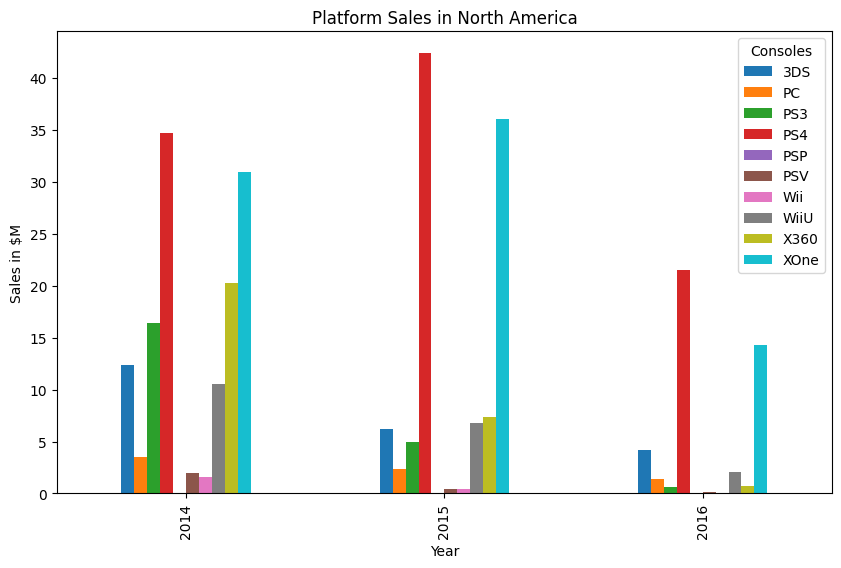

In [ ]:
pivot_data = Platform_Sales_NA.pivot(index='year_of_release', columns='platform', values='na_sales')

pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Platform Sales in North America')
plt.xlabel('Year')
plt.ylabel('Sales in $M')
plt.legend(title='Consoles')
plt.show()

Se agrupan los datos del dataframe videogames por año de lanzamiento, consola y ventas por región, en este caso empezamos con Norteamérica. De igual manera filtramos por los años 2014-2016 y hacemos un gráfica de barras conjunta para mostrar los 3 años en el mismo espacio y poder analizarlo de una manera más clara. Observamos que las consolas PS4 y Xbox One se consolidan como las más populares, ya que han tenido niveles de ventas que se han ido incrementando, de igua lmanera Xbox 360, Wii, Wii U, 3DS y PSV representan la mayor parte del mercado en cuanto a ventas se refiere. Como suele suceder en caso del ciclo de vida de las consolas, las de generacines anteriores empiezan a sufrir una disminución en cuanto a sus niveles de ventas (PS3 & Xbox360). La Pc mantiene niveles estables de ventas aunque no se acercan a los de las consolas más populares. En el caso de las portátiles (3DS & PSV) muestran un desempeño estable también.  

In [ ]:
EU_sales_per_platform = videogames.groupby(['year_of_release', 'platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales')
Platform_Sales_EU = EU_sales_per_platform[EU_sales_per_platform['year_of_release'] >= 2014].sort_values(by='eu_sales', ascending=False)
Platform_Sales_EU

,year_of_release,platform,eu_sales
228,2015,PS4,51.76
218,2014,PS4,46.50
238,2016,PS4,31.78
234,2015,XOne,18.47
217,2014,PS3,18.24
224,2014,XOne,18.15
223,2014,X360,11.28
243,2016,XOne,9.63
216,2014,PC,8.87
215,2014,3DS,8.73


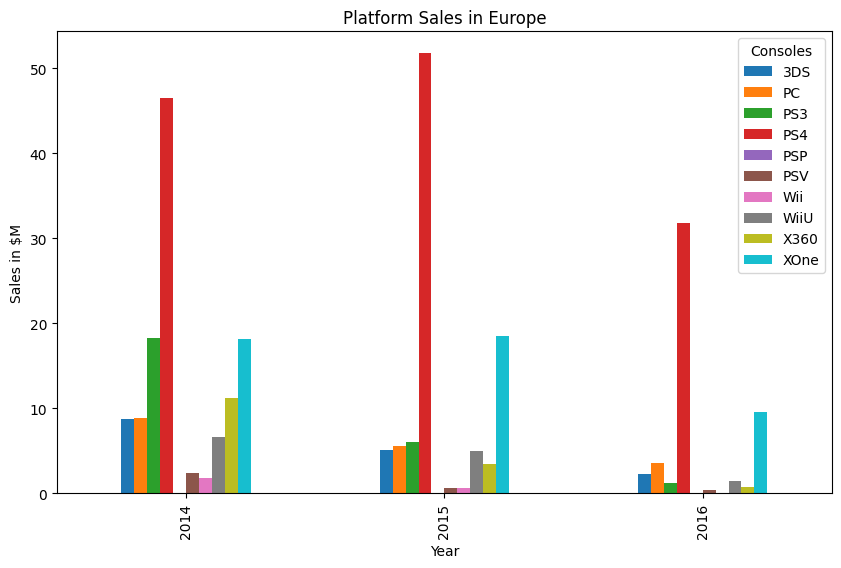

In [ ]:
pivot_data = Platform_Sales_EU.pivot(index='year_of_release', columns='platform', values='eu_sales')

pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Platform Sales in Europe')
plt.xlabel('Year')
plt.ylabel('Sales in $M')
plt.legend(title='Consoles')
plt.show()

Se hace la misma agrupación de datos y filtro por años que en el caso de Norteamérica pero ahora con la región de Europa, también se hace una gráfica de barras conjunta. De manera similar a las ventas en NA, vemos una clara dominación de las consolas de nueva generación (PS4, Xbox One) por lo cual la gente está dejando las consolas de la generación pasada para actualizarse a las nuevas, a pesar de que las consolas anteriores tienen unos nivele de ventas fuertes aún. Vemos un desempeño variable de las consolas portátiles, aunque con niveles de ventas menores a las de las New Gen. Igual la Pc se mantiene con una presencia constante con niveles de ventas estables.

In [ ]:
JP_sales_per_platform = videogames.groupby(['year_of_release', 'platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales')
Platform_Sales_JP = JP_sales_per_platform[JP_sales_per_platform['year_of_release'] >= 2014].sort_values(by='jp_sales', ascending=False)
Platform_Sales_JP

,year_of_release,platform,jp_sales
215,2014,3DS,20.69
225,2015,3DS,15.52
235,2016,3DS,8.03
228,2015,PS4,6.31
217,2014,PS3,6.25
220,2014,PSV,6.13
238,2016,PS4,5.74
230,2015,PSV,4.85
227,2015,PS3,3.67
239,2016,PSV,3.56


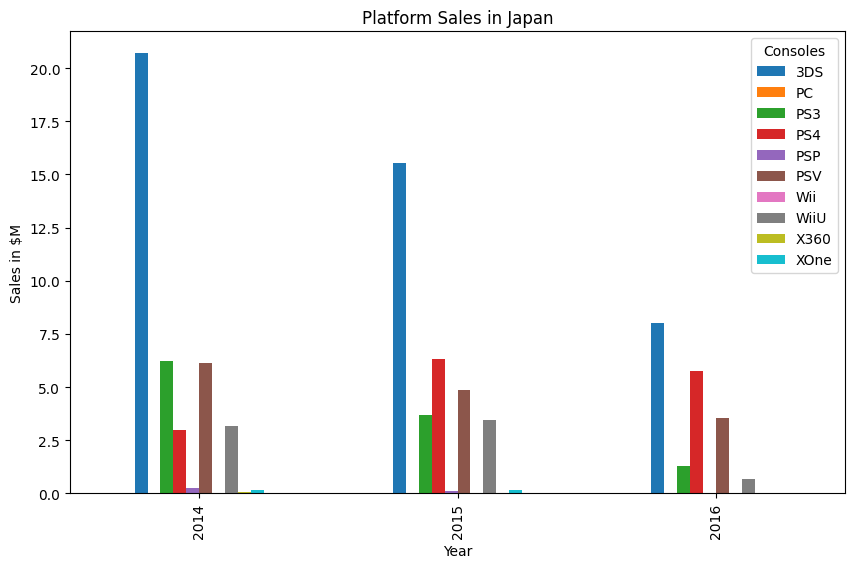

In [ ]:
pivot_data = Platform_Sales_JP.pivot(index='year_of_release', columns='platform', values='jp_sales')

pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Platform Sales in Japan')
plt.xlabel('Year')
plt.ylabel('Sales in $M')
plt.legend(title='Consoles')
plt.show()

Se hace lo propio en el caso de Japón para analizar sus niveles de ventas por consola de esa región. Apreciamos que los japoneses muestran una preferencia clara por Nintendo y en particular el Nintendo 3DS, mantiene el dominio del mercado durante los años filtrados. Las consolas de Sony y Microsoft tienen una buena presencia pero no logran los mismos niveles de Nintendo.; igual la Pc se mantiene con un crecimiento sostenido y estable sin lograr la gran cosa en cuanto a niveles de ventas.

Describiendo las variaciones en cuanto a las consolas de región a región se puede apreciar que se ven influenciadas por varios factores, mas que nada culturales lo cual provoca campañas de marketing adecuadas para los consumidores de región a región.
Producto de esta variaciones lo podemos ver por ejemplo en el caso de la preferencia de Japón por su consola insignia Nintendo, se ve que los consumidores se relacionan con la marca y su historia se ha arraigado profundamente en su cultura desarrollando una lealtad muy marcada, lo cual también puede explicar que alla jueguen más con el Nintendo 3DS a pesar de ser una consola portátil lo cual nunca pasaria en Norteamérica o Europa donde prefieren consolas que puedan conectar a la TV para jugar en casa mayormente, como el PS4 y el Xbox One.
Vemos que en el caso de Europa y Nortamérica como en el caso de los géneros, mantienen tendencias muy similares decantandose por Sony y Microsoft, mientras que Japón como se mencionó anteriormente está claramente dominado por Nintendo.
Todos estos factores se deben de tomar en cuenta al momento de realizar campañas mercadológicas para el año 2017, para asegurarnos de no dejar ningun dato importante de lado.

Los cinco géneros principales. Explica la diferencia.


In [ ]:
Top_NA_genres = (videogames[videogames['year_of_release'] >= 2014].groupby('genre')['na_sales'].sum().nlargest(5))
Top_NA_genres

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [ ]:
Top_EU_genres = (videogames[videogames['year_of_release'] >= 2014].groupby('genre')['eu_sales'].sum().nlargest(5))
Top_EU_genres

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [ ]:
Top_JP_genres = (videogames[videogames['year_of_release'] >= 2014].groupby('genre')['jp_sales'].sum().nlargest(5))
Top_JP_genres

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Se realizan filtros en el dataframe de videogames y agrupamos por género y ventas por región y seleccionamos el argumento nlargest(5) para que nos muestre los cinco géneros más populares por región.
Vemos que en el caso de NA y Europa los juegos de Shooter y de Acción son los más populares, y los de deportes muestran una tendencia a la alza por la experiencia de primera mano de un atleta profesional lo cual es muy popular en esas regiones. En el caso de Japón, vemos que ellos se decantan por los RPG's sobre todo los de open world que como ya se mencionó anteriormente tienen una experiencia inmersiva y esto atrae mucho a los gamers en general, en particular los de allá. Si podemos ver que a diferencia de NA y Europa no muestran la misma fascinación por los juegos deportivos, los de Acción se mantienen en 2do lugar invariablemente a pesar de la región pero a los japoneses les gustan los juegos de fighting, lo cual explica que en los E-Games siempre estén a la cabeza en este género en particular.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
NA_sales_per_rating = videogames.groupby(['year_of_release', 'rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales')
Rating_NA = NA_sales_per_rating[NA_sales_per_rating['year_of_release'] >= 2014].sort_values(by='na_sales', ascending=False)
Rating_NA

,year_of_release,rating,na_sales
115,2014,M,49.39
120,2015,M,31.36
122,2015,Unknown,28.91
117,2014,Unknown,27.28
113,2014,E,24.15
118,2015,E,18.62
116,2014,T,16.09
125,2016,M,15.67
114,2014,E10+,15.36
119,2015,E10+,14.06


In [ ]:
EU_sales_per_rating = videogames.groupby(['year_of_release', 'rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales')
Rating_EU = EU_sales_per_rating[EU_sales_per_rating['year_of_release'] >= 2014].sort_values(by='eu_sales', ascending=False)
Rating_EU

,year_of_release,rating,eu_sales
115,2014,M,47.90
120,2015,M,29.00
122,2015,Unknown,28.24
117,2014,Unknown,23.24
113,2014,E,23.23
118,2015,E,21.22
125,2016,M,16.54
114,2014,E10+,14.62
116,2014,T,13.75
123,2016,E,13.61


In [ ]:
JP_sales_per_rating = videogames.groupby(['year_of_release', 'rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales')
Rating_JP = JP_sales_per_rating[JP_sales_per_rating['year_of_release'] >= 2014].sort_values(by='jp_sales', ascending=False)
Rating_JP

,year_of_release,rating,jp_sales
117,2014,Unknown,24.01
122,2015,Unknown,18.57
127,2016,Unknown,14.32
116,2014,T,7.08
121,2015,T,5.43
118,2015,E,4.18
115,2014,M,3.72
113,2014,E,3.69
120,2015,M,3.09
119,2015,E10+,2.82


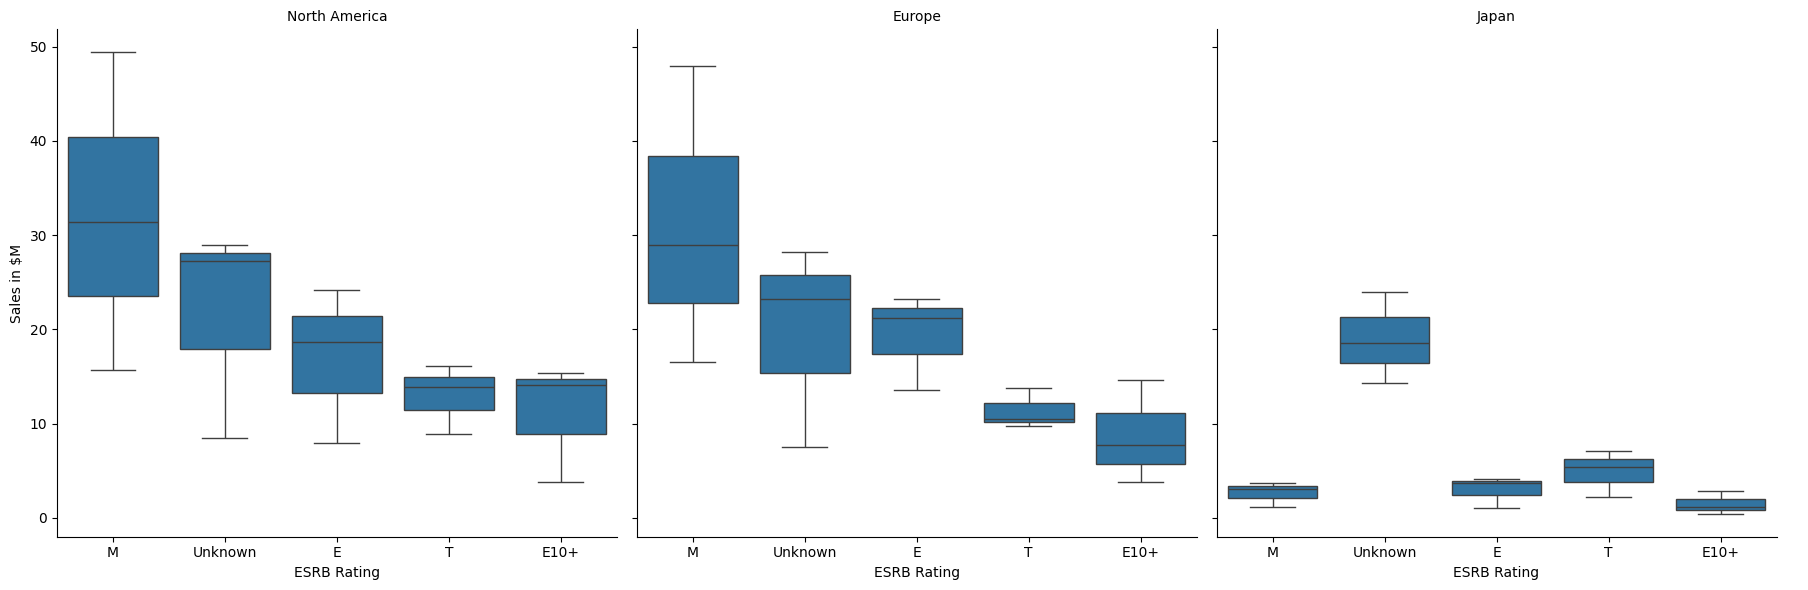

In [ ]:
Rating_NA['region'] = 'North America'
Rating_EU['region'] = 'Europe'
Rating_JP['region'] = 'Japan'

combined_data = pd.concat([Rating_NA[['rating', 'na_sales', 'region']],
                           Rating_EU[['rating', 'eu_sales', 'region']],
                           Rating_JP[['rating', 'jp_sales', 'region']]])


combined_data = pd.melt(combined_data, id_vars=['rating', 'region'],
                        value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                        var_name='sales_type', value_name='sales')


g = sns.FacetGrid(combined_data, col="region", col_wrap=3, height=6, sharey=True)
g.map_dataframe(sns.boxplot, x='rating', y='sales')
g.set_axis_labels('ESRB Rating', 'Sales in $M')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


Se agrupan una vez más las columnas del dataframe videogames para incluir año de lanzamiento, rating y las ventas por región. Se hace una gráfica de caja combinada para poder apreciar los valores de mejor manera, una por región.
Basándonos en el análisis anterior si se puede inferir que los ratings de la ESRB tienen un impacto en las ventas de los videojuegos por región.
Hay ciertas diferencias regionales sobretodo en el caso de las categorias que no cuentan con un rating establecido o aún no se ha declarado, o por alguna razón al momento de extraer los datos no se les asignó un rating y les cambiamos a 'Unknown' para no dejarlos como 'TBD'. Vemos que estos junto con la clasificación M suelen tener las ventas más altas en el caso de NA y Europa; en Japón la distribución es diferente.
Si bien puede ser que la clasificación M sea la más popular por ser muy predilecta entre los jugadores adultos sobretodo, en el caso de Japón es difícil precisar eso por la abundancia de la clasificación 'Unknown' que como se estableció antes falta información para saber si no se le ha asignado una clasificación o si llanamente no se sabe que rating es.
De igual manera podemos ver que los rating E mantienen una preferencia sostenida en el caso de NA y Europa mientras en caso de Japón la clasificación T es la que se mantiene en esos lugares. En el caso de los juegos rating E, hay que tomar en cuenta que estos juegos son el equivalente a la clasificacion A de las películas, asi que estos juegos son para el público en general y debido a esto pueden mantenerse en los favoritos de la gente en Europa y NA; mientras que en Japón el rating T de Teen puede mostrar una predilección por estos géneros denotando la presencia importante de los juegos pertenecientes al demográfico de los adolescentes.

#Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.



In [ ]:
xboxone_data = videogames[(videogames['platform'] == 'XOne') & (videogames['year_of_release'] >= 2014)]['user_score']
pc_data = videogames[(videogames['platform'] == 'PC') & (videogames['year_of_release'] >= 2014)]['user_score']

xboxone_sample = xboxone_data.sample(n=50, random_state=42)
pc_sample = pc_data.sample(n=50, random_state=42)

alpha = 0.05

results = st.ttest_ind(xboxone_sample, pc_sample, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No puedo rechazar la hipótesis nula')



valor p:  0.9290844962655282
No puedo rechazar la hipótesis nula


Se realizan dos filtros para datos del dataframe videogames donde se eligen las plataformas Xbox One y Pc en los años 2014-2016 por la columna de reseña de usuario para comprobar la hipótesis nula usando el criterio basado en valores p. Usamos una declaración de print para poder expresar nuestro resultado de manera más clara inspirada en ejercicios anteriores.
Tenemos que el valor de p es 0.9290844962655282, lo cual es extremadamente alto, mucho más que el valor de significancia típico elegido (0.05) por lo cual no tenemos suficiente evidencia para rechazar la hipótesis nula. Dicho de otra forma, no se puede concluir que exista una diferencia significativa en las puntuaciones promedio de los usuarios entre Xbox One y Pc. Los datos no respaldan que una consola tenga reseñas más altas/bajas que la otra.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
action_data = videogames[(videogames['genre'] == 'Action') & (videogames['year_of_release'] >= 2014)]['user_score']
sports_data = videogames[(videogames['genre'] == 'Sports') & (videogames['year_of_release'] >= 2014)]['user_score']

action_sample = action_data.sample(n=50, random_state=42)
sports_sample = sports_data.sample(n=50, random_state=42)

alpha = 0.05

results = st.ttest_ind(action_sample, sports_sample, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No puedo rechazar la hipótesis nula')



valor p:  1.927225066856668e-07
Rechazo la hipótesis nula


De manera similar al ejercicio anterior, se usan los mismos filtros de años, pero se selecciona la columna de género enfocada al de Acción y al de Deportes en cuanto a la columna de reseña de usuario para comprobar la hipótesis nula.
Obtuvimos un valor p de 1.927225066856668e-07, lo cual es bajo comparado al umbral elegido, con lo cual se puede rechazar la hipótesis nula de que las calificaciones promedio de usuarios para los géneros de Acción y Deportes son iguales. Lo cual quiere decir que hay una diferencia signiticativa entre las calificaciones promedio de estos dos géneros de videojuegos.



Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

La hipótesis nula la formulé apartir de la indicación del ejercicio que por lo regular es que no existe una diferencia significativa entre los grupos que se comparan, y la nula la hice en contraposición de la nula, si se esperaban valores iguales la alternativa es que fueran diferentes y viceversa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Elegí el basado en valores P ya que representa la probabilidad de obtener un resultado como el observado, asumiendo que la hipótesis nula es verdadera, estableciendo el umbral en 0.05. Lo elegí porque es el más utilizado en las pruebas de hipótesis y tomando en cuenta que son datos numéricos lo que estamos utilizando para comprobar o no las hipótesis (calificaciones de usuarios) parece el mejor criterio para utilizarse en base a este contexto.

#Paso 6. Escribe una conclusión general



Al empezar a limpiar los datos durante el preprocesamiento se detectó que realmente no tenían muchas ausencias, los valores duplicados eran entendibles debido a la naturaleza del dataframe. Creo que la limitación más grande eran los valores en rating con 'TBD' en sus filas que se trataron como 'Unknown' debido a la falta de información con respecto a la clasificación de la ESRB, se cree que ciertos datos se pudieron dejar de lado que pudieron contribuir a un análisis más  profundo sobretodo en la parte de agrupar y obtener los ratins para ver si tenian impacto en las ventas por región. Fuera de eso no hubo mayor problema en este paso.
Vale la pena mencionar que se tuvo una ventaja competitiva importante de inicio al ser un admirador de los videojuegos (como es el caso de un servidor) aparte de conocer que consolas salieron, desde el 2016, lo cual se usó de base para los análisis de que consola se usa más por región; fue inevitable aseverar que el ciclo de vida de las consolas estaba llegando a su fin sobretodo cuando Nintendo sacó el switch en el 2017 y ahora estamos con el Switch 2 en puerta. Pero no se considera que esto haya sido un factor determinante que los análisis hayan estado sesgados de alguna manera, creo que mayormente se realizaron de manera objetiva.
Si bien el objetivo principal era identificar los factores clave que determinan el éxito de un videojuego para poder apostar por las consolas o plataformas más rentables, se pudieron identificar patrones interesantes durante las agrupaciones y gráficas. Se observó que los juegos de acción tienden a tener mejor desempeño global en cuanto a ventas. Los de disparos en 1ra persona tienden a ser más populares en regiones de Norteamérica y Europa, no así en Japón. En caso de las consolas, Japón mantiene su romance con Nintendo y las consolas portátiles mientras que Norteamérica y Europa lo hacen con las consolas convencionales sobretodo las nuevas, PS4 y Xbox One, con una presencia de ventas importantes de sus antecesores, PS3 y Xbox 360.
Estos hallazgos pueden proporcionar a la tienda ICE una buena herramienta para identificar proyectos prometedores y diseñar campañas publicitarias más efectivas.
Creo que el tomar una muestra de los tres años anteriores es más que suficiente para soportar esta idea. Las plataformas más rentables es definitivamente un tema regional, no hay una verdad absoluta en cuanto a esto. Sin temor a equivocarme deberian de enfocarse en el PS4 y el Xbox One en el caso de NA y EU, y en Nintendo en el caso de JP (3DS en este caso, Switch el año entrante).
No hay que dejar de lado la preferencia del consumidor americano/europeo sobre el género Shooter y utilizar esto al momento de enarbolar la estrategia de marketing, sin dejar de lado los de Acción y Deportes que son algo que llegó para quedarse y con más compañías peleando por licencias de clubes profesionales denota una clara inclinación de las compañías de videojuegos por mantenerse en el intento de atraer mas jugadores a sus franquicias. Japón ama sus RPG's inmersivos y los del género de peleas, habrá que enfocar la estrategia regional sobre esto en caso de ellos.
Sobre el tema de las reseñas de críticos / usuarios, no denotan una influencia directa sobre la venta en general de videojuegos, al menos no tan fuerte como para decir que una puntuación crítica alta denota que un juego tendrá un éxito sobresaliente, aunque en ciertos casos si hay coincidencias sin ser preponderantes. En el caso de las puntuaciones de usuarios, no se determina que haya una correlación de peso para denotar una evaluación alta y una venta sobresaliente.
En el caso de los ratings de la ESRB, los juegos M y 'Unknown' se encuentran a la cabeza, con diferencias regionales con respecto a ratings E y T que también tienen presencia importante. Si bien, se determinó que existe un impacto, faltaria explorar más o hacer un análisis más exhaustivo para establecer un impacto exacto de estos ratings con respecto a las ventas por región, como datos más detallados, análisis temporales, correlaciones o quizás algun modelo predictivo. Si bien las gráficas sugieren una relación entre la clasificación ESRB y las ventas, se requiere un análisis más exhaustivo para establecer una causalidad clara y cuantificar el impacto exacto de esta clasificación en las ventas de videojuegos por región.
Estos hallazgos sugieren que Ice debería enfocarse en adquirir los derechos de distribución de juegos de acción, especialmente shooters, para los mercados de Norteamérica y Europa. En Japón, los RPG y los juegos de lucha representan una oportunidad de crecimiento. Además, es fundamental adaptar las campañas de marketing a las preferencias de cada región y plataforma.
Considero que estos fueron los hallazgos más importantes durante mi análisis, claro que todo esto siempre es sujeto a interpretación pero los datos son claros con respecto a lo que se necesita hacer para realizar una campaña efectiva y detectar proyectos prometedores para el año 2017, a pesar de las limitaciones de datos anteriormente mencionados.
Para futuras investigaciones, sería bueno realizar un análisis más profundo del impacto de los ratings ESRB en las ventas, considerando factores como la edad de los jugadores y las tendencias. También sería interesante explorar la relación entre las redes sociales y el éxito de los videojuegos.
